In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
housing = datasets.load_boston()
housing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = MinMaxScaler()
standard = StandardScaler()
df_scaled = df.iloc[:, :-1]
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
#minmax
#데이터 값들을 0~1 사이의 값으로 변환시키는 것
#각 변수가 정규분포가 아니거나 표준편차가 작을 깨 효과적
#이상치에 민감
minmax.fit(df_scaled)
minmax_scaled = minmax.transform(df_scaled)

df_minmax = df.copy()
df_minmax.iloc[:, :-1] = minmax_scaled[:, :]
df_minmax

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


In [15]:
#standard
#데이터의 최소와 최대를 모를 때 사용
#모든 피처의 평균을 0 분산을 1로 만듦
#이상치가 있다면 평균과 표준푠차에 영향을 미치기 때문에 데이터의 확산이 달라지게 됨
#(이상치가 많다면 사용하지 않응 것이 좋음)
standard.fit(df_scaled)
standard_scaled = standard.transform(df_scaled)

df_standard = df.copy()
df_standard.iloc[:, :-1] = standard_scaled[:, :]
df_standard

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


In [18]:
from sklearn.model_selection import train_test_split

X_data = df_minmax.drop(columns=['Target'])
y_data = df_minmax.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,
                                                    random_state=13)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [21]:
from sklearn.linear_model import LinearRegression, Lasso
lr = LinearRegression()
lasso = Lasso()

lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)

#각 피처에 대한 회귀계수 값
print("Linear Regression 회귀계수(기울기):", np.round(lr.coef_, 1))
print("Lasso 회귀계수(기울기):", np.round(lasso.coef_, 1))

print("Linear Regression 상수항(절편):", np.round(lr.intercept_, 1))
print("Lasso 상수항(절편):", np.round(lasso.intercept_, 1))

Linear Regression 회귀계수(기울기): [-13.7   5.8  -0.2   2.5  -7.3  18.5   0.2 -17.5   8.4  -7.8  -8.4   2.9
 -20.2]
Lasso 회귀계수(기울기): [-0.   0.  -0.   0.  -0.   0.  -0.   0.  -0.  -1.3 -0.   0.  -6.1]
Linear Regression 상수항(절편): 28.1
Lasso 상수항(절편): 25.1


In [44]:
y_test

477    12.0
451    15.2
29     21.0
0      24.0
312    19.4
       ... 
376    13.9
90     22.6
78     21.2
44     21.2
350    22.9
Name: Target, Length: 102, dtype: float64

In [23]:
y_test_pred_lr = lr.predict(X_test)
y_test_pred_lasso = lasso.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred_lr = lr.predict(X_train)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
print("Linear Regression Train MSE: %.2f" % train_mse_lr)
print("Linear Regression Test MSE: %.2f" % test_mse_lr)

y_train_pred_lasso = lasso.predict(X_train)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("Lasso Train MSE: %.2f" % train_mse_lasso)
print("Lasso Test MSE: %.2f" % test_mse_lasso)

Linear Regression Train MSE: 21.56
Linear Regression Test MSE: 24.32
Lasso Train MSE: 65.56
Lasso Test MSE: 71.12


In [28]:
y_train_pred_lr = lr.predict(X_train)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
print("Linear Regression Train MAE: %.2f" % train_mae_lr)
print("Linear Regression Test MAE: %.2f" % test_mae_lr)

y_train_pred_lasso = lasso.predict(X_train)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
print("Lasso Train MAE: %.2f" % train_mae_lasso)
print("Lasso Test MAE: %.2f" % test_mae_lasso)

Linear Regression Train MAE: 3.22
Linear Regression Test MAE: 3.63
Lasso Train MAE: 5.74
Lasso Test MAE: 6.30


In [29]:
y_train_pred_lr = lr.predict(X_train)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
print("Linear Regression Train R2: %.2f" % train_r2_lr)
print("Linear Regression Test R2: %.2f" % test_r2_lr)

y_train_pred_lasso = lasso.predict(X_train)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
print("Lasso Train R2: %.2f" % train_r2_lasso)
print("Lasso Test R2: %.2f" % test_r2_lasso)

Linear Regression Train R2: 0.74
Linear Regression Test R2: 0.73
Lasso Train R2: 0.21
Lasso Test R2: 0.22


In [31]:
y_train_pred_lr = lr.predict(X_train)
train_rmse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr)
print("Linear Regression Train RMSE: %.2f" % np.sqrt(train_rmse_lr))
print("Linear Regression Test RMSE: %.2f" % np.sqrt(test_rmse_lr))

y_train_pred_lasso = lasso.predict(X_train)
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("Lasso Train RMSE: %.2f" % np.sqrt(train_rmse_lasso))
print("Lasso Test RMSE: %.2f" % np.sqrt(test_rmse_lasso))

Linear Regression Train RMSE: 4.64
Linear Regression Test RMSE: 4.93
Lasso Train RMSE: 8.10
Lasso Test RMSE: 8.43


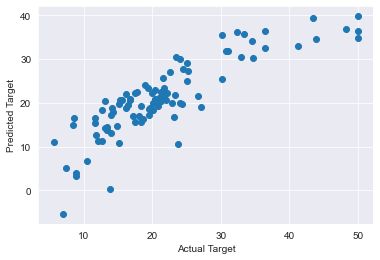

In [48]:
sns.set_style('darkgrid')
plt.scatter(y_test, y_test_pred_lr)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target");